<a href="https://colab.research.google.com/github/iisyafiraa/iisyafiraa/blob/master/Credit_Card_Customer_Churn_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customers churn is the loss of clients or customers. In order to avoid losing customers, a company needs to examine why its customers have left in the past and which features are more important to determine who will churn in the future. Our task is therefore to predict whether customers are about to churn and which are the most important features to get that prediction right. As in most prediction problems, we will use machine learning.

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Upload from drive

In [ ]:
#upload file from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/DFTU/BankChurners.csv',sep=",")

#Glimpse

In [ ]:
data.shape

(10127, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.isna().sum().max()

0

In [ ]:
data.isnull().sum().max()

0

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.head()

#Data Understanding

##Univariate Analysis

###Attrition Flag

In [ ]:
data.Attrition_Flag.value_counts().sort_values()

Attrited Customer    1627
Existing Customer    8500
Name: Attrition_Flag, dtype: int64

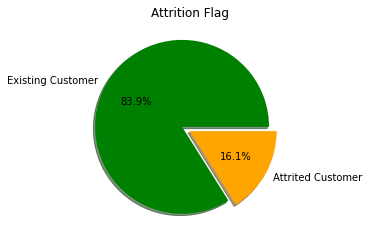

In [ ]:
labels = data["Attrition_Flag"].value_counts(sort = True).index
sizes =  data["Attrition_Flag"].value_counts(sort = True)

colors = ["green","orange"]
explode = (0.1,0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=360)

plt.title("Attrition Flag")
plt.show()

###Customer Age

In [ ]:
data["Customer_Age"]    = ["Muda" if age < 40 else 
                        "Dewasa" if age < 60 else 
                        "Lansia" for age in data.Customer_Age]

In [ ]:
data.Customer_Age.value_counts().sort_values()

Lansia     532
Muda      2036
Dewasa    7559
Name: Customer_Age, dtype: int64

ValueError: ignored

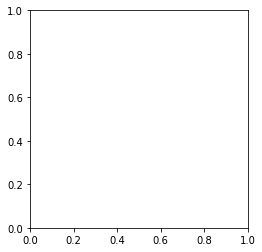

In [ ]:
plt.pie(data.Customer_Age.value_counts().sort_values(), 
        labels=['Muda', 'Lansia', 'Dewasa'], 
        autopct='%1.1f%%')
plt.title("Customer Age")
plt.show()

###Gender

In [ ]:
data.Gender.value_counts().sort_values()

M    4769
F    5358
Name: Gender, dtype: int64

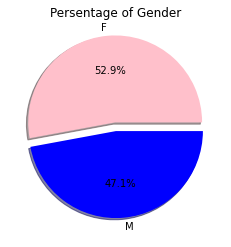

In [ ]:
labels = data["Gender"].value_counts(sort = True).index
sizes =  data["Gender"].value_counts(sort = True)

colors = ["pink","blue"]
explode = (0.1,0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=360)

plt.title("Persentage of Gender")
plt.show()

###Dependent Count

In [ ]:
data.Dependent_count.value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

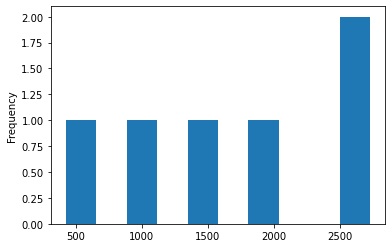

In [ ]:
data["Dependent_count"].value_counts().plot(kind="hist")
plt.show()

###Education Level

In [ ]:
data.Education_Level.value_counts().sort_values()

Doctorate         451
Post-Graduate     516
College          1013
Uneducated       1487
Unknown          1519
High School      2013
Graduate         3128
Name: Education_Level, dtype: int64

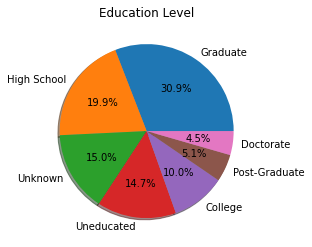

In [ ]:
labels = data["Education_Level"].value_counts(sort = True).index
sizes =  data["Education_Level"].value_counts(sort = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=360)
plt.title("Education Level")
plt.show()

###Marital Status

In [ ]:
data.Marital_Status.value_counts().sort_values()

Divorced     748
Unknown      749
Single      3943
Married     4687
Name: Marital_Status, dtype: int64

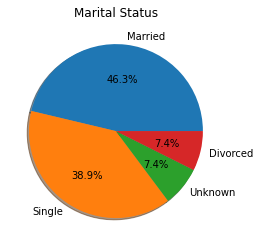

In [ ]:
labels = data["Marital_Status"].value_counts(sort = True).index
sizes =  data["Marital_Status"].value_counts(sort = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=360)
plt.title("Marital Status")
plt.show()

###Income Category

In [ ]:
data.Income_Category.value_counts().sort_values()

$120K +            727
Unknown           1112
$60K - $80K       1402
$80K - $120K      1535
$40K - $60K       1790
Less than $40K    3561
Name: Income_Category, dtype: int64

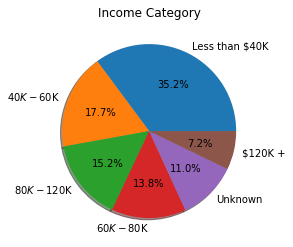

In [ ]:
labels = data["Income_Category"].value_counts(sort = True).index
sizes =  data["Income_Category"].value_counts(sort = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=360)
plt.title("Income Category")
plt.show()

###Card_Category

In [ ]:
data.Card_Category.value_counts().sort_values()

Platinum      20
Gold         116
Silver       555
Blue        9436
Name: Card_Category, dtype: int64

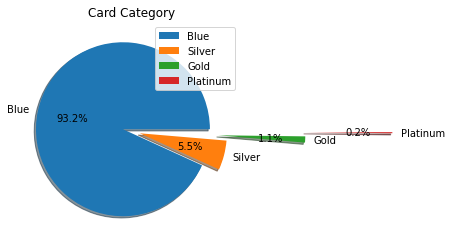

In [ ]:
labels = data["Card_Category"].value_counts(sort = True).index
sizes =  data["Card_Category"].value_counts(sort = True)
explode = [.1,.1,1,2]
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=360)
plt.title("Card Category")
plt.legend()
plt.show()

###Month on Book

In [ ]:
data.Months_on_book.value_counts().sort_values()

14      16
16      29
15      34
17      39
55      42
54      53
18      58
52      62
19      63
13      70
20      74
53      78
51      80
21      83
50      96
56     103
22     105
23     116
49     141
24     160
48     162
25     165
47     171
26     186
46     197
27     206
45     227
44     230
29     241
42     271
43     273
28     275
32     289
41     297
30     300
33     305
35     317
31     318
40     333
39     341
38     347
34     353
37     358
36    2463
Name: Months_on_book, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


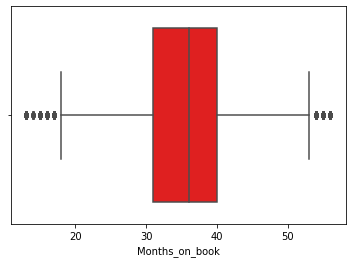

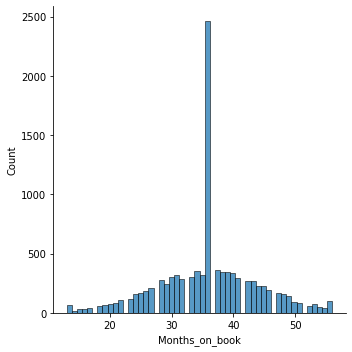

In [ ]:
sns.boxplot(data["Months_on_book"], color="red")
sns.displot(data["Months_on_book"])

###Total Relationship Count

In [ ]:
data.Total_Relationship_Count.value_counts().sort_values()

1     910
2    1243
6    1866
5    1891
4    1912
3    2305
Name: Total_Relationship_Count, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


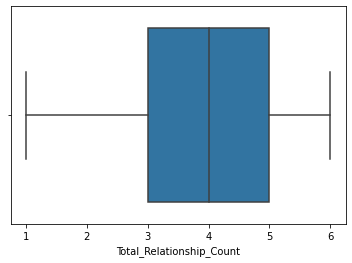

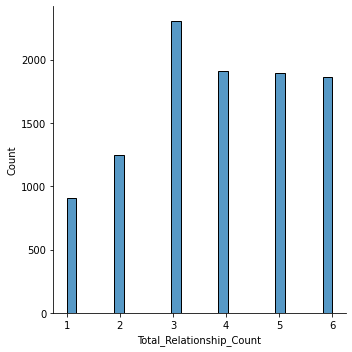

In [ ]:
sns.boxplot(data["Total_Relationship_Count"])
sns.displot(data["Total_Relationship_Count"])

###Months_Inactive_12_mon

In [ ]:
data.Months_Inactive_12_mon.value_counts().sort_values()

0      29
6     124
5     178
4     435
1    2233
2    3282
3    3846
Name: Months_Inactive_12_mon, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


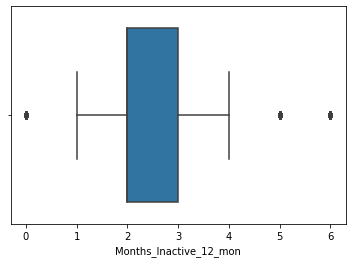

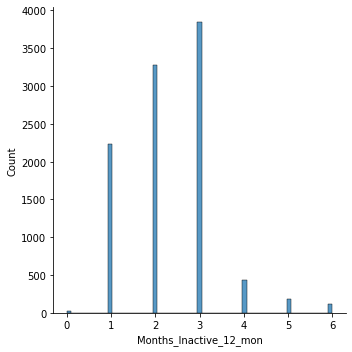

In [ ]:
sns.boxplot(data["Months_Inactive_12_mon"])
sns.displot(data["Months_Inactive_12_mon"])

###Credit Limit

In [ ]:
data.Credit_Limit.value_counts().sort_values()

2080.0       1
5699.0       1
31631.0      1
5393.0       1
21680.0      1
          ... 
23981.0     12
9959.0      18
15987.0     18
1438.3     507
34516.0    508
Name: Credit_Limit, Length: 6205, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


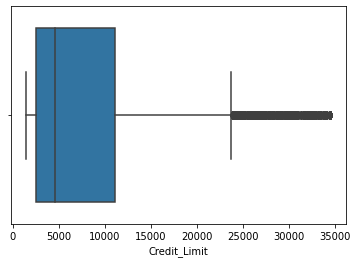

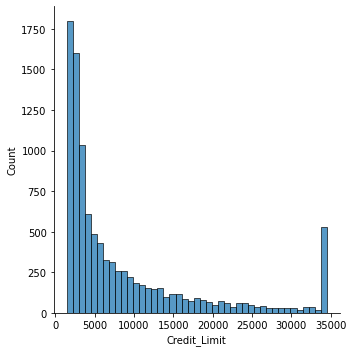

In [ ]:
sns.boxplot(data["Credit_Limit"])
sns.displot(data["Credit_Limit"])

###Total_Revolving_Bal

In [ ]:
data.Total_Revolving_Bal.value_counts().sort_values()

204        1
1011       1
2131       1
471        1
463        1
        ... 
1720      11
1480      12
1965      12
2517     508
0       2470
Name: Total_Revolving_Bal, Length: 1974, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


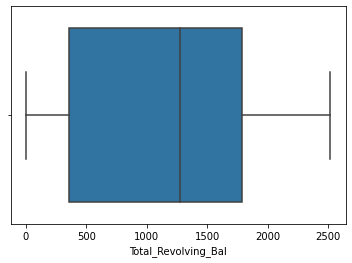

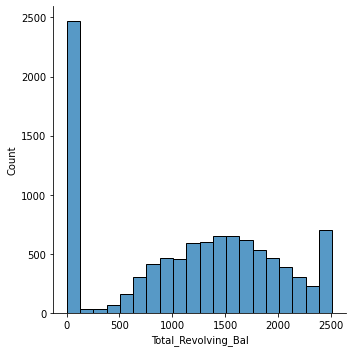

In [ ]:
sns.boxplot(data["Total_Revolving_Bal"])
sns.displot(data["Total_Revolving_Bal"])

###Total_Amt_Chng_Q4_Q1

In [ ]:
data.Total_Amt_Chng_Q4_Q1.value_counts().sort_values()

1.750     1
2.023     1
1.632     1
1.394     1
0.366     1
         ..
0.718    33
0.735    33
0.712    34
0.743    34
0.791    36
Name: Total_Amt_Chng_Q4_Q1, Length: 1158, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


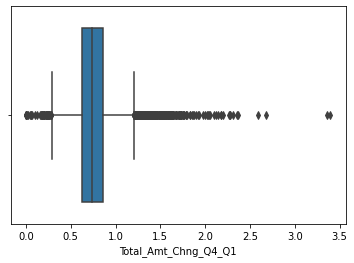

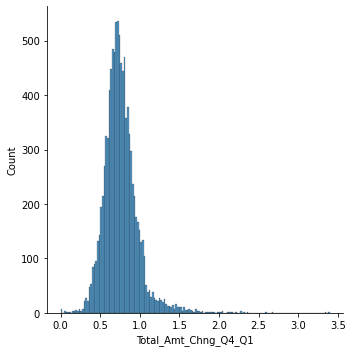

In [ ]:
sns.boxplot(data["Total_Amt_Chng_Q4_Q1"])
sns.displot(data["Total_Amt_Chng_Q4_Q1"])

###Total_Trans_Amt

In [ ]:
data.Total_Trans_Amt.value_counts().sort_values()

10294     1
3169      1
5218      1
1128      1
15471     1
         ..
4869      9
4518     10
2229     10
4509     11
4253     11
Name: Total_Trans_Amt, Length: 5033, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


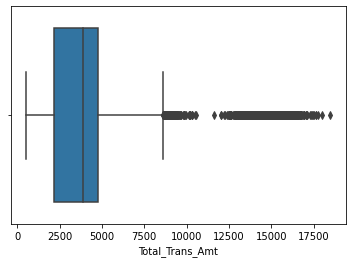

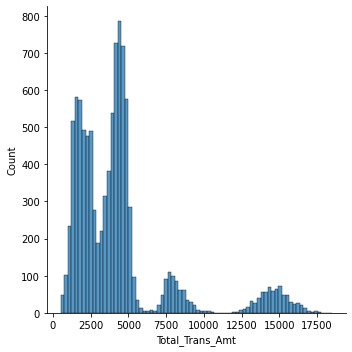

In [ ]:
sns.boxplot(data["Total_Trans_Amt"])
sns.displot(data["Total_Trans_Amt"])

###Total_Trans_Ct

In [ ]:
data.Total_Trans_Ct.value_counts().sort_values()

134      1
138      1
132      1
139      1
11       2
      ... 
69     202
82     202
71     203
75     203
81     208
Name: Total_Trans_Ct, Length: 126, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


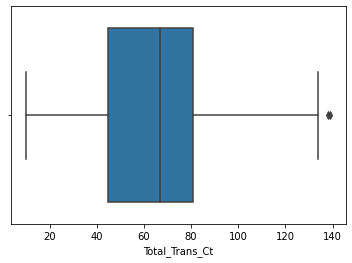

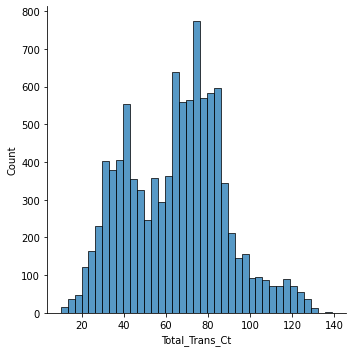

In [ ]:
sns.boxplot(data["Total_Trans_Ct"])
sns.displot(data["Total_Trans_Ct"])

###Total_Ct_Chng_Q4_Q1

In [ ]:
data.Total_Ct_Chng_Q4_Q1.value_counts().sort_values()

1.533      1
0.189      1
0.981      1
2.571      1
0.150      1
        ... 
0.600    113
0.750    156
0.500    161
1.000    166
0.667    171
Name: Total_Ct_Chng_Q4_Q1, Length: 830, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


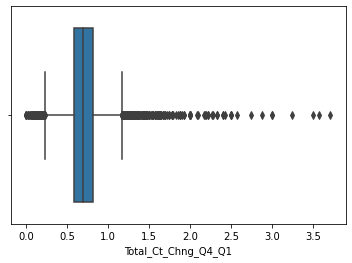

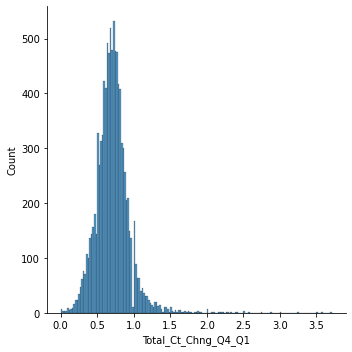

In [ ]:
sns.boxplot(data["Total_Ct_Chng_Q4_Q1"])
sns.displot(data["Total_Ct_Chng_Q4_Q1"])

##Bivariate Analysis

###Attrition Flag VS Gender

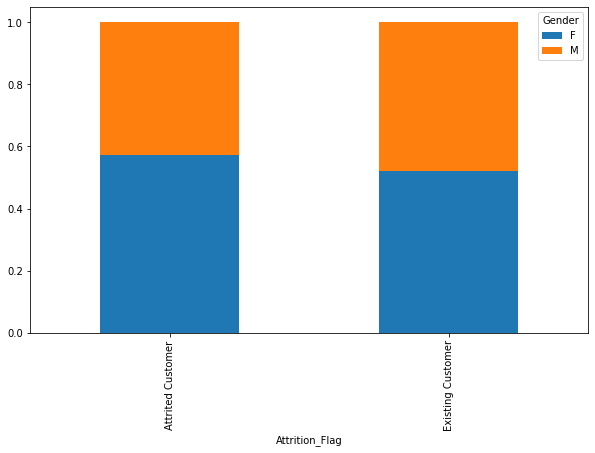

In [ ]:
table1=pd.crosstab(data.Attrition_Flag ,data.Gender).apply(lambda r: r/r.sum(), axis=1)
table1.div(table1.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)

###Attrition Flag VS Education

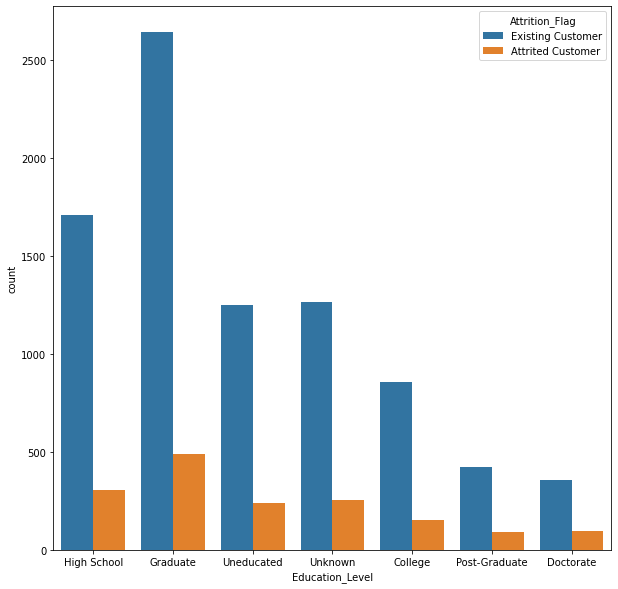

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="Education_Level", hue='Attrition_Flag', data=data)

###Attrition Flag VS Marital Status

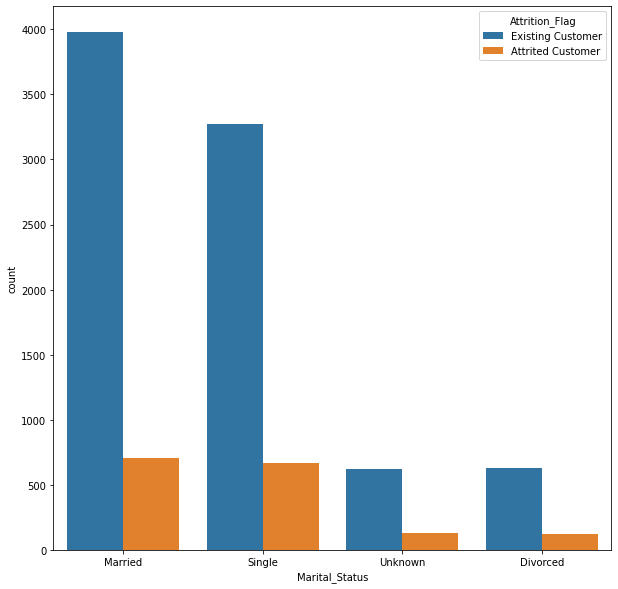

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Marital_Status", hue='Attrition_Flag', data=data)

###Attrition Flag VS Card Category

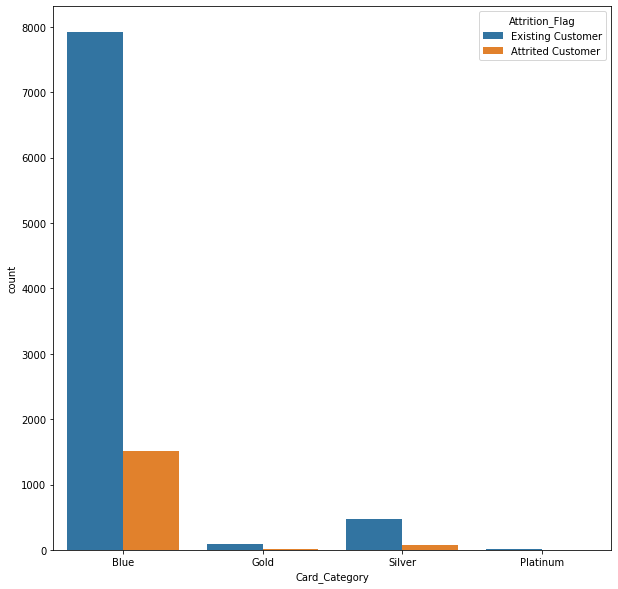

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Card_Category", hue='Attrition_Flag', data=data)

###Attrition Flag VS Income Category

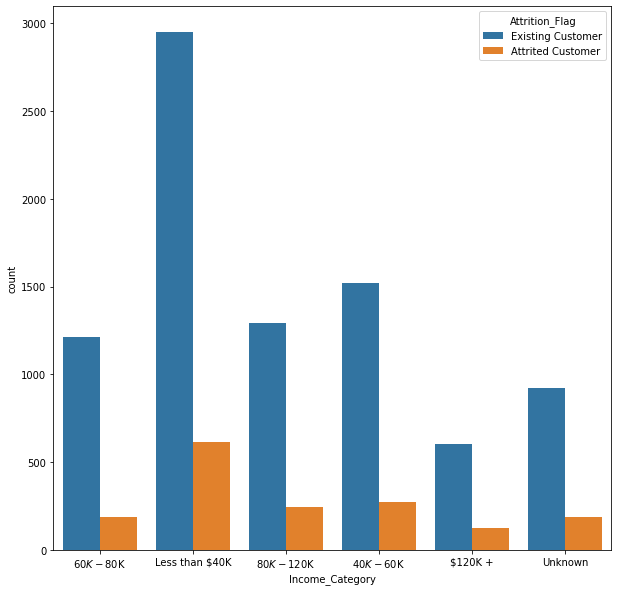

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Income_Category", hue='Attrition_Flag', data=data)

#Data Cleaning and Preprocessing

##1. Drop Duplicate Row and Unnecessary Columns

In [ ]:
print(data["CLIENTNUM"].nunique())

10127


In [ ]:
data_new = data.drop(['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [ ]:
data_new.shape

(10127, 13)

##2. Check Data Types

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLIENTNUM                 10127 non-null  int64 
 1   Attrition_Flag            10127 non-null  object
 2   Customer_Age              10127 non-null  int64 
 3   Gender                    10127 non-null  object
 4   Dependent_count           10127 non-null  int64 
 5   Education_Level           10127 non-null  object
 6   Marital_Status            10127 non-null  object
 7   Income_Category           10127 non-null  object
 8   Card_Category             10127 non-null  object
 9   Total_Relationship_Count  10127 non-null  int64 
 10  Total_Revolving_Bal       10127 non-null  int64 
 11  Total_Trans_Amt           10127 non-null  int64 
 12  Total_Trans_Ct            10127 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.0+ MB


In [ ]:
data_new.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,2517,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,0,816,28


##3. Encoding Variable

In [ ]:
data_new['Attrition_Flag']=(data_new['Attrition_Flag']=='Attrited Customer').astype(int)

In [ ]:
data_new['Gender']=(data_new['Gender']=='F').astype(int)

In [ ]:
data_new = pd.concat([data_new,pd.get_dummies(data_new['Education_Level']).drop(columns=['Unknown'])],axis=1)
data_new = pd.concat([data_new,pd.get_dummies(data_new['Income_Category']).drop(columns=['Unknown'])],axis=1)
data_new = pd.concat([data_new,pd.get_dummies(data_new['Marital_Status']).drop(columns=['Unknown'])],axis=1)
data_new = pd.concat([data_new,pd.get_dummies(data_new['Card_Category']).drop(columns=['Platinum'])],axis=1)
data_new.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

In [ ]:
data_new

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,5,777,1144,42,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,6,864,1291,33,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,4,0,1887,20,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,3,2517,1171,20,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,5,0,816,28,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,3,1851,15476,117,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
10123,1,41,0,2,4,2186,8764,69,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
10124,1,44,1,1,5,0,10291,60,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
10125,1,30,0,2,4,0,8395,62,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
data_new.shape

(10127, 25)

##4. Correlation

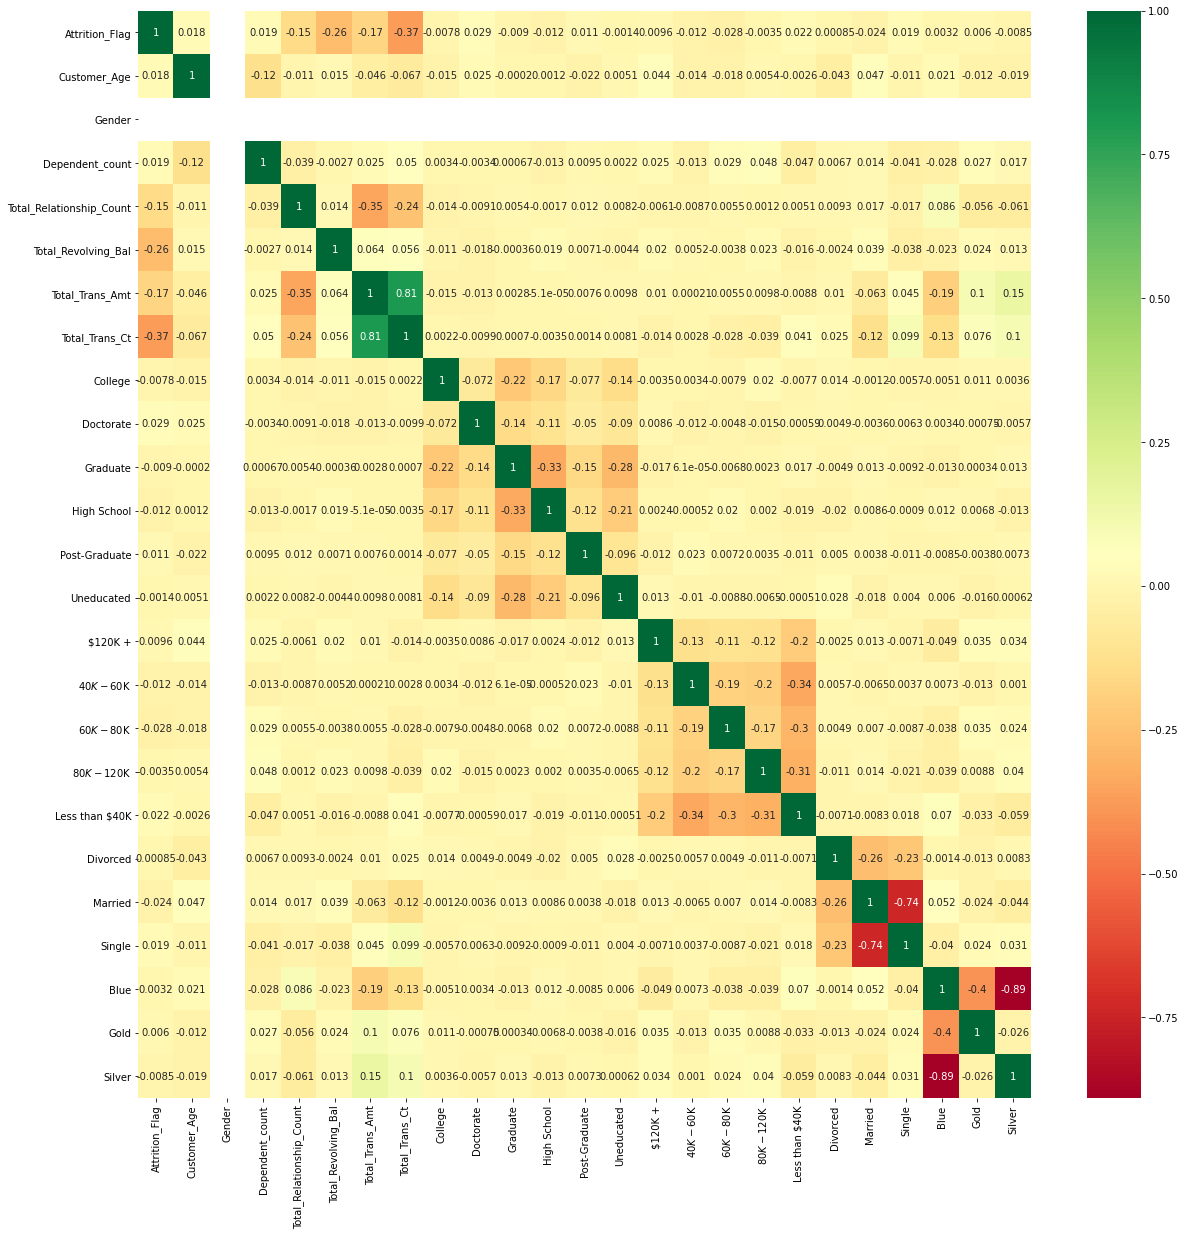

In [ ]:
corrmat = data_new.corr(method = 'pearson') #pandas

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Modelling and Evaluation

##1. Data Partition

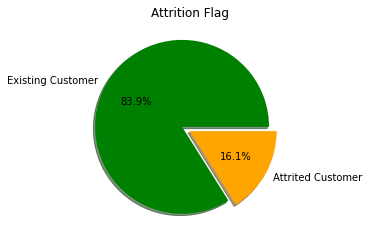

In [ ]:
labels = data["Attrition_Flag"].value_counts(sort = True).index
sizes =  data["Attrition_Flag"].value_counts(sort = True)

colors = ["green","orange"]
explode = (0.1,0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=360)

plt.title("Attrition Flag")
plt.show()

##2. Target Variable Checking

In [ ]:
from sklearn.model_selection import train_test_split

id_col     = ['CLIENTNUM']
target_col = ['Attrition_Flag']

data_model = data_new[['Customer_Age','Gender','Dependent_count','Total_Relationship_Count','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Attrition_Flag']]

train, test = train_test_split(data_model, test_size = .20, random_state = 111)
    
cols    = [i for i in data_model.columns if i not in id_col + (target_col)]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

##3. Handling Imbalance Data (Under Sampling)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler()
x_new, y_new = rus.fit_resample(train_X, train_Y)


##Modelling

###a. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_new,y_new)

In [ ]:
y_pred = LR.predict(test_X)

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_Y, y_pred)
roc_auc = auc(fpr, tpr)

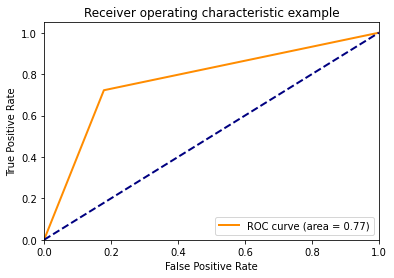

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.7718044131087609

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(test_Y,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.72      0.54       324
           0       0.94      0.82      0.88      1702

    accuracy                           0.81      2026
   macro avg       0.69      0.77      0.71      2026
weighted avg       0.86      0.81      0.82      2026



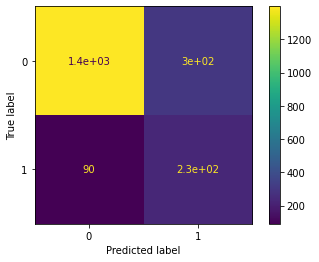

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, test_X, test_Y)  # doctest: +SKIP
plt.show()

###b. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF1 = RandomForestClassifier(n_estimators=400, max_depth=10,min_samples_leaf=1,max_features='sqrt',
                             min_samples_split=5, criterion='gini')
RF1.fit(x_new,y_new)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

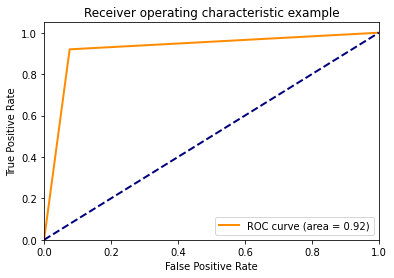

In [ ]:
y_pred = RF1.predict(test_X)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_Y, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.9216861789325558

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(test_Y,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.92      0.79       324
           0       0.98      0.92      0.95      1702

    accuracy                           0.92      2026
   macro avg       0.84      0.92      0.87      2026
weighted avg       0.94      0.92      0.93      2026



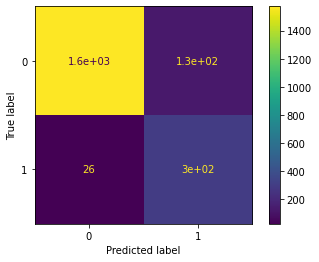

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF1, test_X, test_Y)  # doctest: +SKIP
plt.show()

###c. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(x_new,y_new)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

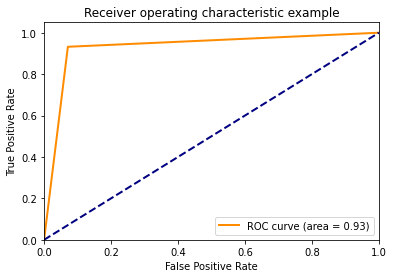

In [ ]:
y_pred = GBC.predict(test_X)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_Y, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.9305029667348509

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(test_Y,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.93      0.81       324
           0       0.99      0.93      0.96      1702

    accuracy                           0.93      2026
   macro avg       0.85      0.93      0.88      2026
weighted avg       0.94      0.93      0.93      2026



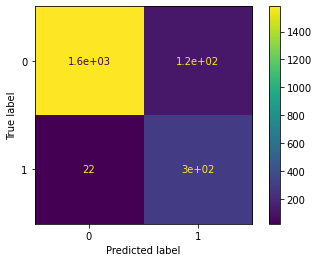

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(GBC, test_X, test_Y)  # doctest: +SKIP
plt.show()  # doctest: +SKIP